## Mackey-Glass equation - 1D example

In [249]:
using CairoMakie
using LinearAlgebra
include("mackeyglassfunc.jl") #system of Mackey-Glass equation
include("mackeytau.jl") #Delay forumla for Mackey-Glass equation
include("f_deriv.jl") #used to find state and/or parameter derivatives
include("jacobian_new.jl") #Jacobian function
include("newton_new.jl") #Newton function
include("F_eq.jl") #Initialisates a function to find equilibria 
include("track_curve_new.jl") #Tracking curve function (used for continuation and equilibria branches)
include("stab_func.jl") #finds stability and eigenvalues (and eigenvector and ω is interested in Hopf bifurcation)

stab_func (generic function with 1 method)

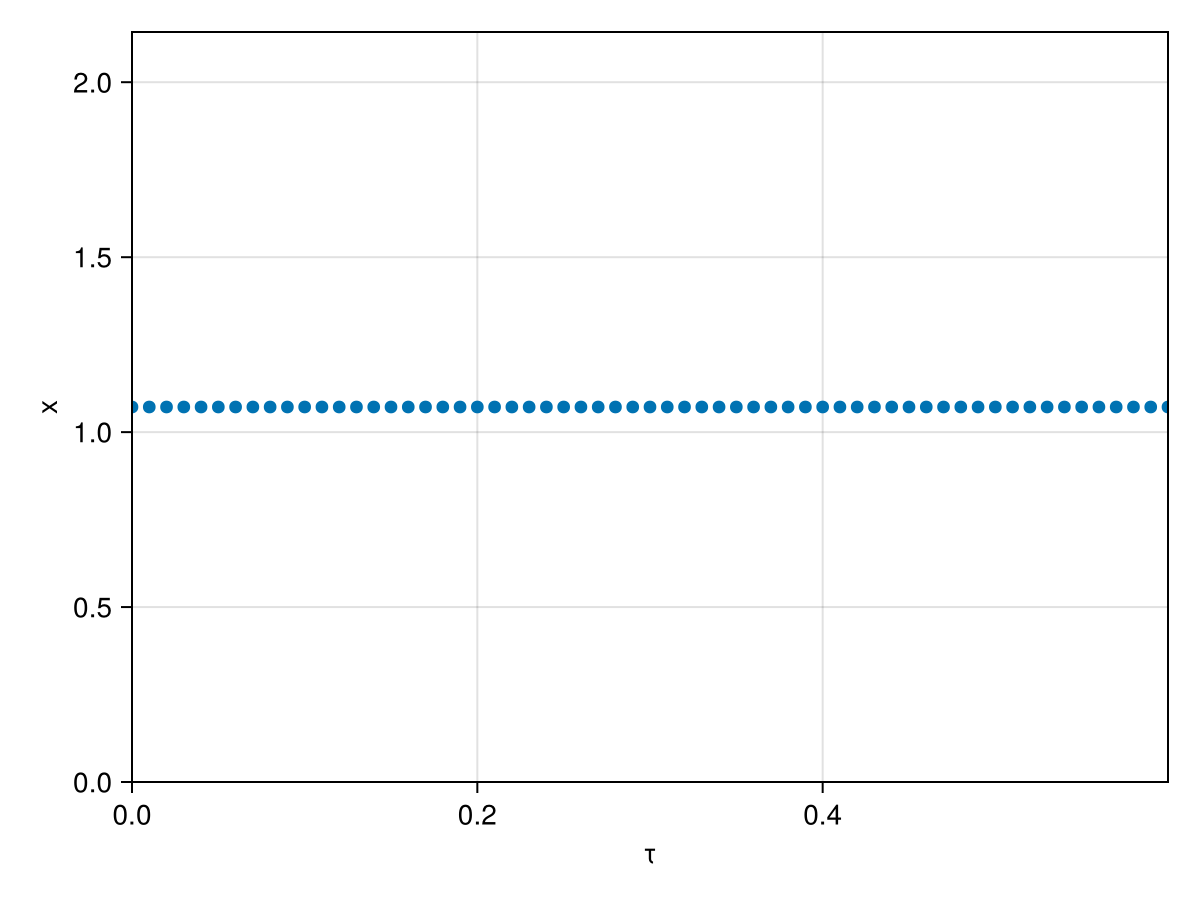

In [250]:
gamma=1.0
#initial states for following parameters (obtained from DDE-Biftool example)
beta=3
n=10 #n=3 gives γ/β >=1-2/n so all of x should be stable (By Gupta source)
tau=0
x0=((beta-gamma)/(gamma))^(1/n) #obtained from solving f(x*,...,x*)=0 problem
nd=1 #one delay

y01,feq=F_eq(mackeyglassfunc, x0, [beta,gamma,n,tau],nd, par_indx=4)
ylist1,ytan1=track_curve_new(feq,y01,[0.0,1],stepsize=0.01,nmax=100) 


fig1=Figure()
ax1=Axis(fig1[1,1],xlabel="τ",ylabel="x")
scatter!(ax1,[u[2] for u in ylist1],[u[1] for u in ylist1])
xlims!(ax1,[0,0.6])
fig1

In [251]:
y01

2-element Vector{Float64}:
 1.0717734625362931
 0.0

In [277]:
feq(y01)

1-element Vector{Float64}:
 4.440892098500626e-16

# Stability

In [278]:
#stability of initial point
stab_func(mackeyglassfunc,mackeytau, [x0], [0.4],[gamma,beta,n,tau], [4], nd, doprint=1)

(1, ComplexF64[-486.51461195002094 + 0.0im, -486.0535830677114 - 14.778751511941524im, -486.0535830677114 + 14.778751511941524im, -484.67227779306313 - 29.50017686181868im, -484.67227779306313 + 29.50017686181868im, -482.376033333308 - 44.10717136732152im, -482.376033333308 + 44.10717136732152im, -479.1737220284348 - 58.54307244622151im, -479.1737220284348 + 58.54307244622151im, -475.0777169354542 - 72.75187852141954im  …  -17.09463543694013 - 63.1664428705286im, -17.09463543694013 + 63.1664428705286im, -12.966408579959328 - 48.587379940698675im, -12.966408579959328 + 48.587379940698675im, -9.507634953966225 - 33.76002215544665im, -9.507634953966225 + 33.76002215544665im, -6.428535683316941 - 18.725746058307646im, -6.428535683316941 + 18.725746058307646im, -2.1662242687912956 - 4.361538812500976im, -2.1662242687912956 + 4.361538812500976im], ComplexF64[0.0012657252216339537 + 0.0im 0.0012656960118353994 - 3.872325452963215e-5im … 0.011468571710556838 + 0.05999289589042448im 0.011468571

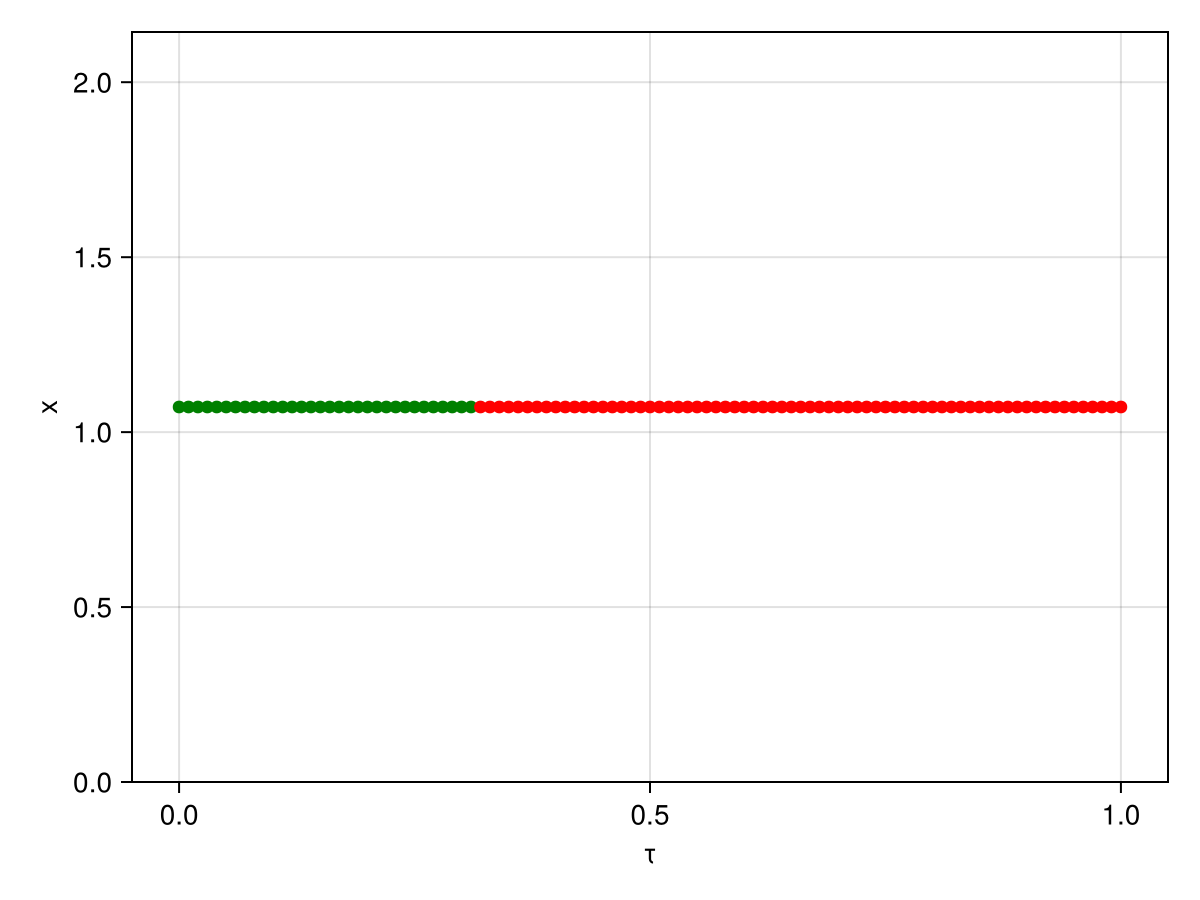

In [279]:
xmat1=hcat([u[1] for u in ylist1])
xlist1=[xmat1[i,:] for i in 1:size(xmat1,1)]

plist1=[u[2] for u in ylist1]

m=100 #number of discretised steps
nx=1 #number of states 
neq=length(plist1) #number of equilibrium points we're finding the stability of
stab=fill(NaN,neq)
#eigvals1=[fill(0.0+0.0*im,nx*(1+nd*m)) for _ in 1:neq]

#for i in 1:neq
for i in 2:neq
    #stab[i],eigvals1[i],=stab_func(mackeyglassfunc,mackeytau,xlist1[i],[plist1[i]],[beta,gamma,n,tau],[4],nd,doprint=1,m=m)
    stab[i]=stab_func(mackeyglassfunc,mackeytau,xlist1[i],[plist1[i]],[beta, gamma,n,tau],[4],nd,doprint=0,m=m)[1]
end
#stab
stab[1]=1.0 #NOTE THIS IS AN EDUCATED GUESS - NEED TO MAKE MY STABILITY FUNCTION WORK FOR IT!! (currently have m/tau=m/0 in stability function for i=1)
stable=(stab.==1.0)
unstable=(stab.==0.0)

fig2=Figure()
ax2=Axis(fig2[1,1],xlabel="τ",ylabel="x")
scatter!(ax2,plist1[stable],[u[1] for u in xlist1[stable]], color="green")
scatter!(ax2,plist1[unstable],[u[1] for u in xlist1[unstable]], color="red")
#xlims!(ax2,[0.0,0.6])
#xlims!(ax2,[0,0.6])
fig2


In [280]:
n

10

In [281]:
#hopf_indx=findlast(isequal(0.0), stab)
hopf_indx=findfirst(isequal(1.0), stab[3:end])
p_hopf_est=plist1[hopf_indx+2]

0.02

In [282]:
include("create_hopffunc.jl")
yh01,fhopf=create_hopffunc(mackeyglassfunc,mackeytau,[gamma,beta,n,tau],xlist1[hopf_indx],[plist1[hopf_indx]],[4],nd)
#yh01,fhopf=create_hopffunc(mackeyglassfunc,mackeytau,[gamma,beta,n,tau],xlist1[hopf_indx],[0.55],[4],nd)
println("The initial guess for Hopf info: $yh01")
yh1,conv1,=newton_new(fhopf,yh01)
println("The true information for the Hopf bifurcation: $yh1")
println("converged?: $conv1")
a_hopf=yh1[end]
om_hopf=yh1[end-1]
x_hopf=yh1[1]
println("The a value for hopf bifurcation: $a_hopf")
println("The ω value for hopf bifurcation: $om_hopf")

ArgumentError: ArgumentError: matrix contains Infs or NaNs

In [283]:
#gamma=1.0
#initial states for following parameters (obtained from DDE-Biftool example)
#beta=2
#n=5
#tau=2
#x0=(beta-1)^(1/n) #obtained from DDE-Biftool demo
#nd=1 #one delay

#y01,feq=F_eq(mackeyglassfunc, x0, [gamma,beta,n,tau],nd, par_indx=4)#par_indx=2)
#y01,feq=F_eq(mackeyglassfunc,[0.0], [gamma,beta,n,tau],nd, par_indx=3)#par_indx=2)

#ylist1,ytan1=track_curve_new(feq,y01,[0.0,1],stepsize=0.01,nmax=1000) #i think it should output 1's for x value
#ylist1,ytan1=track_curve_new(feq,y01,[1.0,1],stepsize=0.01,nmax=1000) #i think it should output 1's for x value

#ylist1,ytan1=track_curve_new(feq,y01,[0.0,1],stepsize=0.1,nmax=10) #i think it should output 1's for x value

#ylist1,ytan1=track_curve_new(feq,y01,[0.0,1],nmax=150) #i think it should output 1's for x value
#ylist2,ytan2=track_curve_new(feq,y01,[0,0],nmax=150) #i think it should output 1's for x value


#fig1=Figure()
#ax1=Axis(fig1[1,1],xlabel="n",ylabel="x")
#scatter!(ax1,[u[2] for u in ylist1],[u[1] for u in ylist1])
#scatter!(ax1,[u[2] for u in ylist2],[u[1] for u in ylist2])

#xlims!(ax1,[0.0,5])
#fig1